Importing required libraries


In [3]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import sklearn


In [4]:
#Importing Dataset

data = pd.read_csv('/content/loan_approval_dataset.csv')

In [5]:
data

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


Data Preprocessing

In [6]:
#Handling missing values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [7]:
#Checking for null values

data.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [8]:
#splitting the data into X and Y

X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values

Handling Categorical value

In [9]:
#Coverting graduate, not graduate to 0 and 1

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])


In [10]:
X[:, 3] = le.fit_transform(X[:, 3])

In [11]:
Y = le.fit_transform(Y)

In [12]:
X

array([[1, 2, 0, ..., 17600000, 22700000, 8000000],
       [2, 0, 1, ..., 2200000, 8800000, 3300000],
       [3, 3, 0, ..., 4500000, 33300000, 12800000],
       ...,
       [4267, 2, 1, ..., 12400000, 18100000, 7300000],
       [4268, 1, 1, ..., 700000, 14100000, 5800000],
       [4269, 1, 0, ..., 11800000, 35700000, 12000000]], dtype=object)

In [13]:
Y

array([0, 1, 1, ..., 1, 0, 0])

Exploratory Data Analysis

In [14]:
data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


<ipython-input-15-abfdfd9d4272>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


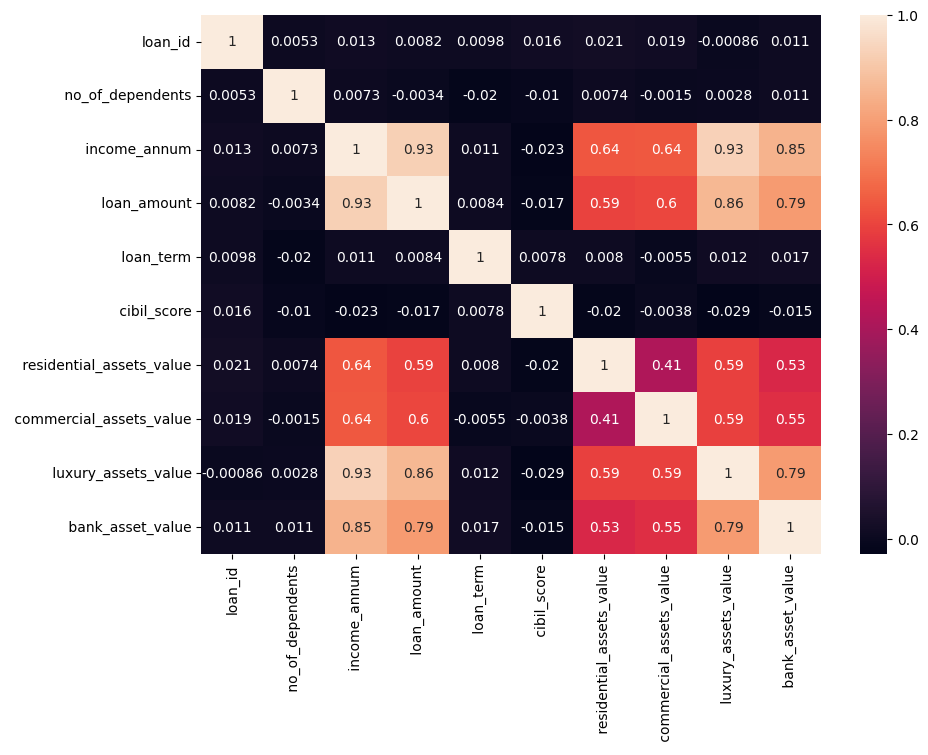

In [15]:
#Visual analysis

import seaborn as sns

plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True)
plt.show()

Splitting the data into train and test

In [16]:
#Train test split is used to split the data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

Scaling the data

In [17]:
#Using standardscaler to scale to data

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x_train)
std_xtrain = ss.transform(x_train)
std_xtest = ss.transform(x_test)

Model Training

In [18]:
#DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 1)
dt.fit(x_train, y_train)
dtpreds = dt.predict(x_test)

from sklearn.metrics import accuracy_score
dtacc = accuracy_score(y_test, dtpreds)
dtacc

0.9672131147540983

In [19]:
#RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 1)
rf.fit(x_train, y_train)
rfpreds = rf.predict(x_test)

rfacc = accuracy_score(y_test, rfpreds)
rfacc

0.9859484777517564

In [20]:
#KNN classifier

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(std_xtrain, y_train)
knnpreds = knn.predict(std_xtest)

knnacc = accuracy_score(y_test, knnpreds)
knnacc


0.8899297423887588

In [21]:
#xgboost classifier

import xgboost as xgb
xgbc = xgb.XGBClassifier(random_state = 1)
xgbc.fit(x_train, y_train)
xgbpreds = xgbc.predict(x_test)

xgbcacc = accuracy_score(y_test, xgbpreds)
xgbcacc

0.9824355971896955

In [22]:
#Artificial Neural Network

import tensorflow as tf

ann = tf.keras.models.Sequential()

In [23]:
ann.add(tf.keras.layers.Dense(units = 100, activation = 'relu'))

In [24]:
ann.add(tf.keras.layers.Dense(units = 100, activation = 'relu'))

In [25]:
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [26]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [27]:
X1=np.asarray(x_train).astype(np.float32)

Y1=np.asarray(y_train).astype(np.float32)

In [28]:

ann.fit(X1, Y1, batch_size = 100, epochs = 100)

Epoch 1/100
35/35 [==============================] - 1s 2ms/step - loss: 150475.1562 - accuracy: 0.5426
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 38298.2734 - accuracy: 0.5318
Epoch 3/100
35/35 [==============================] - 0s 2ms/step - loss: 21902.4492 - accuracy: 0.5461
Epoch 4/100
35/35 [==============================] - 0s 2ms/step - loss: 27483.4316 - accuracy: 0.5523
Epoch 5/100
35/35 [==============================] - 0s 2ms/step - loss: 22774.5430 - accuracy: 0.5558
Epoch 6/100
35/35 [==============================] - 0s 2ms/step - loss: 53075.9531 - accuracy: 0.5394
Epoch 7/100
35/35 [==============================] - 0s 2ms/step - loss: 30393.5371 - accuracy: 0.5602
Epoch 8/100
35/35 [==============================] - 0s 2ms/step - loss: 22621.6387 - accuracy: 0.5558
Epoch 9/100
35/35 [==============================] - 0s 2ms/step - loss: 19897.2383 - accuracy: 0.5490
Epoch 10/100
35/35 [==============================] - 0s 2ms/step - loss

Tuning the Random Forest model

In [29]:
#Tuning with hyper parameters

from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
rfc = RandomForestClassifier()

skf = StratifiedKFold(n_splits = 5)

hyper_params = {'criterion':['gini', 'entropy'],
                'ccp_alpha':np.linspace(0,0.0001,5),
                'max_features':np.linspace(0.8,1,4),
                'max_samples':np.linspace(0.9,1,3),
                'n_estimators':range(80,121,10)}

rcv = RandomizedSearchCV(rfc, param_distributions = hyper_params, cv = skf, scoring = 'accuracy')

rcv.fit(X, Y)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(),
                   param_distributions={'ccp_alpha': array([0.0e+00, 2.5e-05, 5.0e-05, 7.5e-05, 1.0e-04]),
                                        'criterion': ['gini', 'entropy'],
                                        'max_features': array([0.8       , 0.86666667, 0.93333333, 1.        ]),
                                        'max_samples': array([0.9 , 0.95, 1.  ]),
                                        'n_estimators': range(80, 121, 10)},
                   scoring='accuracy')

In [30]:
rcv.best_params_

{'n_estimators': 120,
 'max_samples': 0.95,
 'max_features': 0.8666666666666667,
 'criterion': 'entropy',
 'ccp_alpha': 5e-05}

In [31]:
rfcacc = rcv.best_score_
rfcacc

0.9831351532406633

Comparing the models

In [32]:
acc_scores =[ ['KNN Classifier', knnacc], ['DecisionTreeClassifier', dtacc],
             ['RandomForestClassifier', rfacc], ['XgboostClassifier', xgbcacc],
              ['RandomForestTuning', rfcacc ]]
loan_pred = pd.DataFrame(acc_scores, columns = ['classification models' ,'accuracy_score'])
loan_pred

,classification models,accuracy_score
0,KNN Classifier,0.889930
1,DecisionTreeClassifier,0.967213
2,RandomForestClassifier,0.985948
3,XgboostClassifier,0.982436
4,RandomForestTuning,0.983135


Random forest classifier model predicts beter than other models

Save the best model

In [33]:
pickle.dump(rf, open('loanrf.pkl', 'wb'))